In [32]:
# import keras
# # from keras.datasets import fashion_mnist  # new with Keras 2.1.2.  Yah!!
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# from keras import backend as K

In [33]:
import csv
from PIL import Image
import numpy as np
import string
import os
from sklearn.model_selection import train_test_split

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from pathlib import Path
from keras.preprocessing import image
import numpy as np
from PIL import Image

In [35]:
import pandas as pd
df = pd.read_csv('./A_Z_Hand_Data.csv')
df.shape



(372450, 785)

In [36]:
y_data = df['0'].to_numpy(copy=True)
y_data.shape

(372450,)

In [37]:
x_dat = df.drop(['0'],axis=1).to_numpy(copy=True)
x_dat.shape

(372450, 784)

In [38]:
type(x_dat)

numpy.ndarray

In [39]:
x_data = x_dat.reshape(x_dat.shape[0],28,28,1)

In [40]:
x_data.shape

(372450, 28, 28, 1)

In [41]:
from keras.preprocessing import image
image.array_to_img(x_data[1])

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [43]:
# Number of classes - do not change unless the data changes
num_classes = 26

In [44]:
# sizes of batch and # of epochs of data
batch_size = 1024
epochs = 24

In [45]:
#   Type convert and scale the test and training data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(y_train[0:3])



x_train shape: (297960, 28, 28, 1)
x_test shape: (74490, 28, 28, 1)
[10  1 20]


In [46]:
input_shape = x_train.shape[1:]
input_shape

(28, 28, 1)

In [47]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0:1]) 
print(y_train[1:2])# verify one-hot encoding

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


In [48]:
# Define the model
model = Sequential()

In [49]:
from keras.callbacks import EarlyStopping


In [50]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [51]:
# Create a CNN to classify the images
model.add(Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [52]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),callbacks=[early_stop])



Train on 297960 samples, validate on 74490 samples
Epoch 1/24
297960/297960 [==============================] - 509s 2ms/step - loss: 0.7338 - acc: 0.7897 - val_loss: 0.1591 - val_acc: 0.9541
Epoch 2/24
297960/297960 [==============================] - 517s 2ms/step - loss: 0.2140 - acc: 0.9388 - val_loss: 0.1015 - val_acc: 0.9709
Epoch 3/24
297960/297960 [==============================] - 515s 2ms/step - loss: 0.1612 - acc: 0.9548 - val_loss: 0.0799 - val_acc: 0.9776
Epoch 4/24
297960/297960 [==============================] - 488s 2ms/step - loss: 0.1365 - acc: 0.9620 - val_loss: 0.0699 - val_acc: 0.9809
Epoch 5/24
297960/297960 [==============================] - 509s 2ms/step - loss: 0.1205 - acc: 0.9665 - val_loss: 0.0644 - val_acc: 0.9823
Epoch 6/24
297960/297960 [==============================] - 491s 2ms/step - loss: 0.1108 - acc: 0.9692 - val_loss: 0.0619 - val_acc: 0.9830
Epoch 7/24
297960/297960 [==============================] - 504s 2ms/step - loss: 0.1009 - acc: 0.9719 - val_

Test loss: 0.03633420554943723
Test accuracy: 0.990938380990737


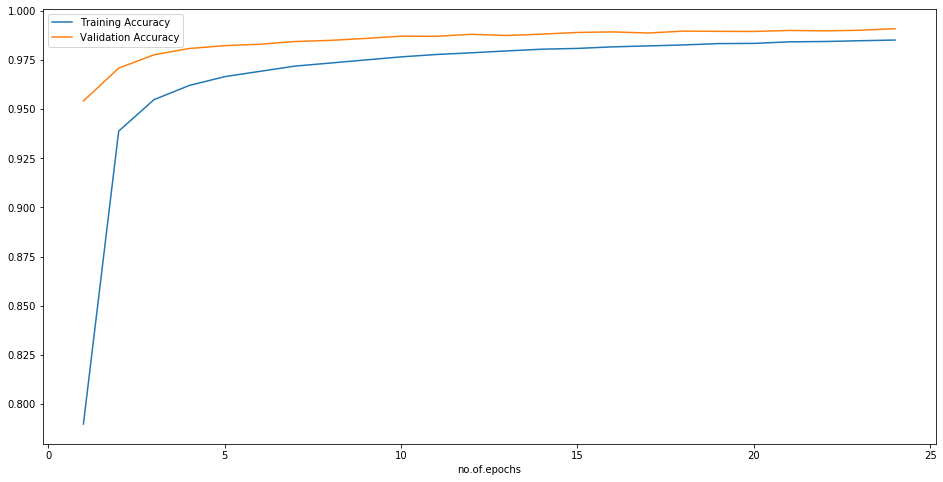

In [57]:
#   Evaluate the model with the test data to get the scores on "real" data.
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#   Plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,8))
epoch_list = list(range(1, len(hist.history['acc']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.xlabel("no.of.epochs")
plt.show()

In [58]:
# Save neural network structure
from pathlib import Path
model_structure = model.to_json()
f = Path("Handwriting_Recog_model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("Handwriting_Recog_model_weights")

In [80]:

# csv_File_Path = (r'./A_Z_Hand_Data.csv')


# count = 1
# last_digit_Name =  None

# image_Folder_Path = (r'../CNN')# Target folder path

# Alphabet_Mapping_List = list(string.ascii_uppercase)

# for alphabet in Alphabet_Mapping_List:
#     path = image_Folder_Path + '/' + alphabet
#     if not os.path.exists(path):
#         os.makedirs(path)

# with open(csv_File_Path, newline='') as csvfile:
#     reader = csv.reader(csvfile, delimiter=',', quotechar='|')
#     count = 0
#     for row in reader:
#         digit_Name = row.pop(0)
#         image_array = np.asarray(row)
#         image_array = image_array.reshape(28, 28)
#         new_image = Image.fromarray(image_array.astype('uint8'))

#         if last_digit_Name != str(Alphabet_Mapping_List[(int)(digit_Name)]):
#             last_digit_Name = str(Alphabet_Mapping_List[(int)(digit_Name)])
#             count = 0
#             print ("")
#             print ("Prcessing Alphabet - " + str (last_digit_Name))
        
#         image_Path = image_Folder_Path + '/' + last_digit_Name + '/' + str(last_digit_Name) + '-' + str(count) + '.png'
#         new_image.save(image_Path)
#         count = count + 1

#         if count % 1000 == 0:
#             print ("Images processed: " + str(count))

In [81]:
# Number of classes - do not change unless the data changes
num_classes = 26

In [82]:
# sizes of batch and # of epochs of data
batch_size = 128
epochs = 24

In [84]:
y_data

array([ 0,  0,  0, ..., 25, 25, 25])

In [26]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [27]:
#   Type convert and scale the test and training data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(y_train[0:3])



x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
[9 0 0]


In [29]:
# convert class vectors to binary class matrices.  One-hot encoding
#  3 => 0 0 0 1 0 0 0 0 0 0 and 1 => 0 1 0 0 0 0 0 0 0 0 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0:1]) 
print(y_train[1:2])# verify one-hot encoding

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [30]:
# Define the model
model = Sequential()

In [1]:
# # Create a CNN to classify the images
# model.add(Conv2D(32, kernel_size=(3, 3),
#                   activation='relu',
#                   input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

In [2]:
# #   define compile to minimize categorical loss, use ada delta optimized, and optimize to maximizing accuracy
# model.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=keras.optimizers.Adadelta(),
#               metrics=['accuracy'])

# #   Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
# #   Return history of loss and accuracy for each epoch
# hist = model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(x_test, y_test))



In [3]:
# #   Evaluate the model with the test data to get the scores on "real" data.
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

# #   Plot data to see relationships in training and validation data
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# epoch_list = list(range(1, len(hist.history['acc']) + 1))  # values for x axis [1, 2, ..., # of epochs]
# plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
# plt.legend(('Training Accuracy', 'Validation Accuracy'))
# plt.show()

In [4]:
# #print summary statistics of the model
# model.summary()

In [39]:
# Save neural network structure
from pathlib import Path
model_structure = model.to_json()
f = Path("cnn_mnist_model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("cnn_mnist_model_weights.h5")